## Prototype for the partial history test
Code runs in a script at partial_history.py

In [40]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, "./utils/")
import HH, Stimuli
from neuron import h
h.load_file("stdrun.hoc")
from neuron.units import mV, ms

## Hyperparameters

In [11]:
num_input_patterns_per_n = 100
ns = [n for n in range(3,31)]
excitatory_interval = 5
inhibitory_interval = 15

num_histories = 250

data_dir = './data/partial_history/'

## Generate Stimuli

In [94]:
stimuli = {}

for n in ns:
    stimuli[n] = {}
    for pattern_ind in range(num_input_patterns_per_n):
        stimuli[n][pattern_ind] = Stimuli.excitatory_and_inhibitory_n(excitatory_interval, inhibitory_interval, n)

# write to file
with open(data_dir + "stimuli.json", "w") as fout:
    fout.write(json.dumps(stimuli))

## Generate Histories

In [4]:
stim_params = Stimuli.ExperimentalStimParams()

In [7]:
df_base, spikes, stims = HH.run_poisson_sim([stim_params.ex_base, stim_params.in_base])
df_lw, spikes, stims = HH.run_poisson_sim([stim_params.ex_lw, stim_params.in_lw])
df_lt, spikes, stims = HH.run_poisson_sim([stim_params.ex_lt, stim_params.in_lt])
df_lwlt, spikes, stims = HH.run_poisson_sim([stim_params.ex_lwlt, stim_params.in_lwlt])
df_burst, spikes, stims = HH.run_poisson_sim([stim_params.ex_burst, stim_params.in_burst])

In [17]:
history_inds = np.random.randint(250, 400000-250, num_histories)
histories_base = np.array(
    [
        [df_base['v'][history_ind] for history_ind in history_inds],
        [df_base['m'][history_ind] for history_ind in history_inds],
        [df_base['h'][history_ind] for history_ind in history_inds],
        [df_base['n'][history_ind] for history_ind in history_inds],
    ]
)
histories_lw = np.array(
    [
        [df_lw['v'][history_ind] for history_ind in history_inds],
        [df_lw['m'][history_ind] for history_ind in history_inds],
        [df_lw['h'][history_ind] for history_ind in history_inds],
        [df_lw['n'][history_ind] for history_ind in history_inds],
    ]
)
histories_lt = np.array(
    [
        [df_lt['v'][history_ind] for history_ind in history_inds],
        [df_lt['m'][history_ind] for history_ind in history_inds],
        [df_lt['h'][history_ind] for history_ind in history_inds],
        [df_lt['n'][history_ind] for history_ind in history_inds],
    ]
)
histories_lwlt = np.array(
    [
        [df_lwlt['v'][history_ind] for history_ind in history_inds],
        [df_lwlt['m'][history_ind] for history_ind in history_inds],
        [df_lwlt['h'][history_ind] for history_ind in history_inds],
        [df_lwlt['n'][history_ind] for history_ind in history_inds],
    ]
)
histories_burst = np.array(
    [
        [df_burst['v'][history_ind] for history_ind in history_inds],
        [df_burst['m'][history_ind] for history_ind in history_inds],
        [df_burst['h'][history_ind] for history_ind in history_inds],
        [df_burst['n'][history_ind] for history_ind in history_inds],
    ]
)

In [92]:
27*1000*1000*5

135000000

In [35]:
histories_sets = {
    'base': histories_base,
    'lw': histories_lw,
    'lt': histories_lt,
    'lwlt': histories_lwlt,
    'burst': histories_burst
}

In [21]:
# write histories to file
np.save(data_dir+'histories_base', histories_base)
np.save(data_dir+'histories_lw', histories_lw)
np.save(data_dir+'histories_lt', histories_lt)
np.save(data_dir+'histories_lwlt', histories_lwlt)
np.save(data_dir+'histories_burst', histories_burst)

## Run Experiment

In [ ]:
stim_scaffold = {
    'base': {
        'ex': Stimuli.PoissonStim(
            'ex_base', 'ex_base',
            interval=5,
            rev_potential=0,
            weight=0.0002,
            tau=2,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_base', 'in_base',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=6,
            seed='na'
        )
    },
    'lw': {
        'ex': Stimuli.PoissonStim(
            'ex_lw', 'ex_lw',
            interval=5,
            rev_potential=0,
            weight=0.00015,
            tau=2,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lw', 'in_lw',
            interval=15,
            rev_potential=-80,
            weight=0.0002,
            tau=6,
            seed='na'
        )
    },
    'lt': {
        'ex': Stimuli.PoissonStim(
            'ex_lt', 'ex_lt',
            interval=5,
            rev_potential=0,
            weight=0.0002,
            tau=10,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lt', 'in_lt',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=40,
            seed='na'
        )
    },
    'lwlt': {
        'ex': Stimuli.PoissonStim(
            'ex_lwlt', 'ex_lwlt',
            interval=5,
            rev_potential=0,
            weight=0.00015,
            tau=10,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lwlt', 'in_lwlt',
            interval=15,
            rev_potential=-80,
            weight=0.0002,
            tau=40,
            seed='na'
        )
    },
    'burst': {
        'ex': Stimuli.PoissonStim(
            'ex_burst', 'ex_burst',
            interval=5,
            rev_potential=0,
            weight=0.0001,
            tau=40,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_burst', 'in_burst',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=20,
            seed='na'
        )
    }
}

In [84]:
import time
start_time = time.time()

In [91]:
(((20*1000*27)/60)/60)/24

6.25

In [80]:
#for n in ns:
for n in [10]:
    print(f'running experiments with {n} inputs')
    #for pattern_ind in range(num_input_patterns_per_n):
    for pattern_ind in [50]:
        
        _stims = stimuli[n][pattern_ind]
        # run a bunch of cells in parallel
        stim_duration = max([t for stim_type, t in _stims]) # total duration of the stimuli
        
        _e_times = [t for stim_type, t in _stims if stim_type == 'e']
        _i_times = [t for stim_type, t in _stims if stim_type == 'i']
        
        cells = {}
        fInitializeHandlers = []
        
        print(f'setting up {len(histories_sets) * num_input_patterns_per_n * num_histories} cells')
        for stim_type in histories_sets:
            cells[stim_type] = {}
            for history_ind in range(num_histories):
                history = histories_sets[stim_type][:, history_ind]
                
                cells[stim_type][history_ind] = HH.HH()
                stim_scaffold[stim_type]['ex'].stim_times = _e_times
                stim_scaffold[stim_type]['in'].stim_times = _i_times
                cells[stim_type][history_ind].add_custom_stimulus(stim_scaffold[stim_type]['ex'])
                cells[stim_type][history_ind].add_custom_stimulus(stim_scaffold[stim_type]['in'])
                cells[stim_type][history_ind].sim_init(
                    v0 = history[0],
                    m0 = history[1],
                    h0 = history[2],
                    n0 = history[3]
                )
                fInitializeHandlers.append(h.FInitializeHandler(cells[stim_type][history_ind].do_sim_init))
                
        print(f'running simulation')
        h.finitialize(-65)
        h.continuerun(stim_duration + 20 * ms)
        print(f'simulation ended')
        print(f'recording results')
        for stim_type in histories_sets:
            results = []
            for history_ind in range(num_histories):
                nsts = [spike - stim_duration for spike in list(cells[stim_type][history_ind].spike_times)]
                nsts = [nst for nst in nsts if nst > 0]
                if len(nsts) < 1:
                    results.append(np.nan)
                else:
                    results.append(min(nsts))
            np.save(f'{data_dir}results/{stim_type}_{n}_{pattern_ind}', np.array(results))

running experiments with 10 inputs
setting up 125000 cells
running simulation
simulation ended
recording results


## Peak at output

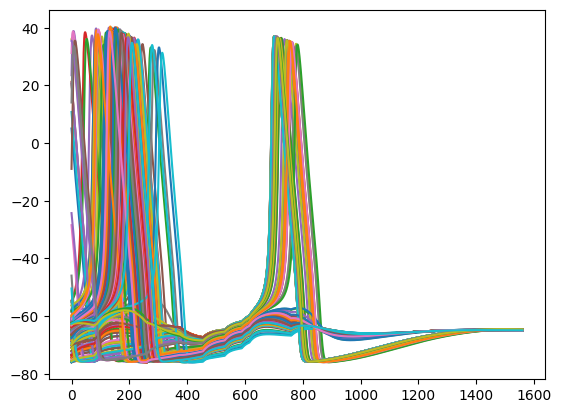

In [75]:
for i in range(250):
    plt.plot(cells['base'][i]._v)

In [81]:
# make sure the cell's initial history is set correctly

In [82]:
ind = 1

print(cells['base'][ind]._v[0])
print(cells['base'][ind]._m[0])
print(cells['base'][ind]._h[0])
print(cells['base'][ind]._n[0])

-64.28677790145275
0.05792109937733741
0.6006558106557828
0.3151671457562539


In [83]:
histories_sets['base'][:,1]

array([-6.42867779e+01,  5.79210994e-02,  6.00655811e-01,  3.15167146e-01])